2. 尝试调整模型结构（变更神经元数量，增加隐藏层）来提升模型预测的准确率

In [6]:
# 导入KMNIST数据集
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor #转换图像数据为张量
from torchvision.datasets import KMNIST # 导入KMNIST数据集
from torch.utils.data import DataLoader # 导入DataLoader数据加载器

In [19]:
# 定义超参数
LR = 0.01
BATCH_SIZE = 128
epochs = 20

In [20]:
# 加载数据集
train_dataset = KMNIST(root='./data', train=True, download=True, transform=ToTensor())
test_dataset = KMNIST(root='./data', train=False, download=True, transform=ToTensor())

In [22]:
# 创建数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [24]:
# 定义训练模型
def train_iter(epochs, model, train_loader):
    print(f"----------------model is :{model}")
    
    train_history = []
    # 定义损失函数,优化器
    loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
    optimizer = optim.SGD(model.parameters(), lr=LR)

    for epoch in range(epochs):
        # 提取数据
        for data, target in train_loader:
            # 前向计算
            data = data.reshape(-1, 784)  # 将数据展平
            output = model(data)
            # 计算损失
            loss = loss_fn(output, target)
            # 反向传播
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # 打印损失
        print("Epoch:", epoch, "Loss:", loss.item())
        # 记录训练损失
        train_history.append(loss.item())
    return train_history

In [25]:
# 定义可视化损失值函数
def draw_train_hist(hist):
    import matplotlib.pyplot as plt
    
    plt.plot(hist)
    
    plt.title('train loss')
    
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [27]:
# 测试模型
def test_acc(test_loader, model):
    correct = 0
    total = 0
    with torch.no_grad():  # 禁用梯度计算
        for data, target in test_loader:
            data = data.reshape(-1, 784)  # 将数据展平
            output = model(data)
            _, predicted = torch.max(output.data, 1)  # 取最大值,返回索引
            total += target.size(0)  # size(0) 等效于 shape[0]

            correct += (predicted == target).sum().item()
    print("Accuracy of the network on the test images: %d %%" % (100 * correct / total))
    return correct / total * 100

In [29]:
#定义模型: 两个隐藏层,sigmoid激活函数
model1 = nn.Sequential(
    nn.Linear(784, 512),  # 输入层到隐藏层
    nn.Sigmoid(),            # 激活函数
    nn.Linear(512, 256),  # 隐藏层到隐藏层
    nn.Sigmoid(),            # 激活函数
    nn.Linear(256, 10)    # 隐藏层到输出层
)

#定义模型: 两个隐藏层,relu激活函数
model2 = nn.Sequential(
    nn.Linear(784, 512),  # 输入层到隐藏层
    nn.ReLU(),            # 激活函数
    nn.Linear(512, 256),  # 隐藏层到隐藏层
    nn.ReLU(),            # 激活函数
    nn.Linear(256, 10)    # 隐藏层到输出层
)

#定义模型:一个隐藏层,relu激活函数
model3 = nn.Sequential(
    nn.Linear(784, 512),  # 输入层到隐藏层
    nn.ReLU(),            # 激活函数
    nn.Linear(512, 10)    # 隐藏层到输出层
)


In [32]:
#训练3个模型
model1_hist = train_iter(epochs, model1, train_loader)
model2_hist = train_iter(epochs, model2, train_loader)
model3_hist = train_iter(epochs, model3, train_loader)



----------------model is :Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=256, out_features=10, bias=True)
)
Epoch: 0 Loss: 2.29280161857605
Epoch: 1 Loss: 2.284970283508301
Epoch: 2 Loss: 2.2690281867980957
Epoch: 3 Loss: 2.2411820888519287
Epoch: 4 Loss: 2.2086985111236572
Epoch: 5 Loss: 2.1399049758911133
Epoch: 6 Loss: 2.028700351715088
Epoch: 7 Loss: 1.9028955698013306
Epoch: 8 Loss: 1.8828274011611938
Epoch: 9 Loss: 1.7940171957015991
Epoch: 10 Loss: 1.6902722120285034
Epoch: 11 Loss: 1.5589019060134888
Epoch: 12 Loss: 1.5863999128341675
Epoch: 13 Loss: 1.5468254089355469
Epoch: 14 Loss: 1.4598498344421387
Epoch: 15 Loss: 1.393078327178955
Epoch: 16 Loss: 1.2565799951553345
Epoch: 17 Loss: 1.1644448041915894
Epoch: 18 Loss: 1.1129173040390015
Epoch: 19 Loss: 1.2541640996932983
----------------model is :Sequential(
  (0): Linear(in_feature

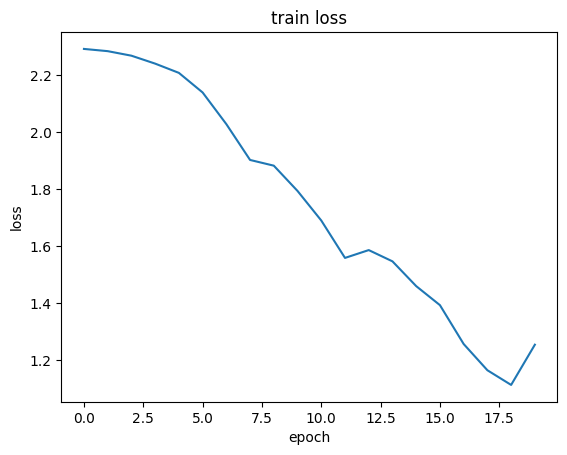

In [33]:
# 不同模型的训练损失可视化

draw_train_hist(model1_hist)

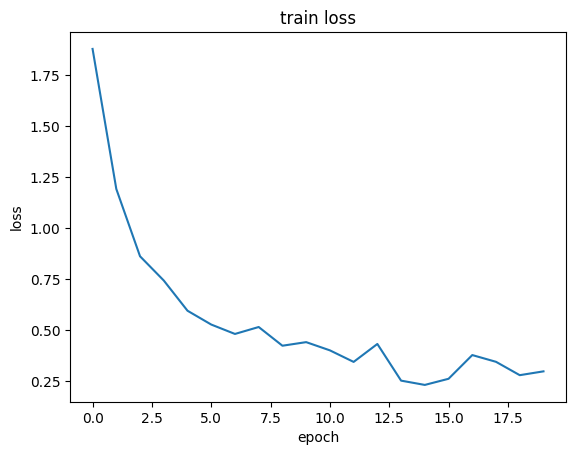

In [34]:
draw_train_hist(model2_hist)

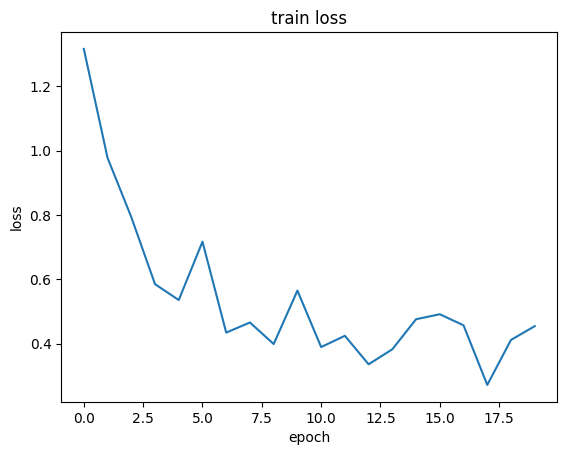

In [35]:
draw_train_hist(model3_hist)

In [36]:
# 不同模型测试准确率
print("model1 test accuracy:",test_acc(test_loader, model1))
print("model2 test accuracy:",test_acc(test_loader, model2))
print("model3 test accuracy:",test_acc(test_loader, model3))


Accuracy of the network on the test images: 53 %
model1 test accuracy: 53.18000000000001
Accuracy of the network on the test images: 79 %
model2 test accuracy: 79.92
Accuracy of the network on the test images: 77 %
model3 test accuracy: 77.63
